In [1]:
# Importing required libraries

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Using GPU

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Loading train and test datasets 

train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True,   
                                           download=True,
                                           transform=torchvision.transforms.Compose([
                                           torchvision.transforms.ToTensor(),
                                           torchvision.transforms.Normalize((0.1307,), (0.3081,))]))
                                           

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=False,   
                                           download=True,
                                           transform=torchvision.transforms.Compose([
                                           torchvision.transforms.ToTensor(),
                                           torchvision.transforms.Normalize((0.1307,), (0.3081,))]))

## Neural Network

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):

      conv1=self.conv1(x)
      max_pool1=F.max_pool2d(conv1, 2)
      act1=F.relu(max_pool1)

      conv2=self.conv2(act1)
      drop1=self.conv2_drop(conv2)
      max_pool2=F.max_pool2d(drop1, 2)
      act2=F.relu(max_pool2)
      act2=act2.view(-1, 320)

      lin1=self.fc1(act2)
      act3=F.relu(lin1)
      drop2 = F.dropout(act3, training=self.training)

      lin2=self.fc2(drop2)
      act4=F.log_softmax(lin2,dim=1)

      return act4

In [6]:
# Determining loss function
criterion= nn.NLLLoss()

In [7]:
train_losses = []
test_losses = []
scores=[]
label_list=[]
output_list=[]

In [8]:
# Train function

def train():
  model.train()
  n_iterations= len(train_loader)
  total_train_loss=0
  for i, (data, target) in enumerate(train_loader):
    data =data.to(device) 
    target=target.to(device)

    #forward pass
    output=model(data)
    optimizer.zero_grad()

    #train loss
    train_loss=criterion(output,target)
    total_train_loss +=train_loss

    #backward pass
    train_loss.backward()

    #update
    optimizer.step()

  avg_train_loss=total_train_loss/n_iterations
  train_losses.append(avg_train_loss.detach().numpy())
  print(f"Train loss={avg_train_loss:.4f}")
  return train_losses


In [9]:
# Test and evaluation function

def test():
  model.eval()
  n_iterations= len(test_loader)
  with torch.no_grad():
    total_test_loss=0
    correct=0
    for data, target in test_loader:
      data =data.to(device) 
      target=target.to(device)
      label_list.extend(target.numpy())

      output=model(data)
      test_loss=criterion(output,target)
      total_test_loss +=test_loss

      pred = output.data.max(1, keepdim=True)[1]
      output_list.extend(pred.numpy())
      correct += pred.eq(target.data.view_as(pred)).sum()
    
    accuracy= (correct/10000)*100
    avg_test_loss=total_test_loss/n_iterations

    test_losses.append(avg_test_loss.numpy())
    scores.append(accuracy.numpy())

    print(f"Test loss={avg_test_loss:.4f}")
    print(f"Accuracy= %{accuracy:.2f} \n")
    return test_losses,scores,label_list,output_list  

### Tuning batch size, learning rate and epoch number

In [12]:
num_epochs=15

for batch_size in [10,100]:
  print(f"\n\n   Batch size: {batch_size}")

  # Defining train and test dataloaders for different batch sizes

  train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=True)

  test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=True)


  for learning_rate in [0.01,0.001]:
    print(f"\n>>Learning rate: {learning_rate}")
    
    # Defining model and optimizer for different batch sizes and learning rates

    model = CNN().to(device)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
      print(f"Epoch {epoch+1}:")
      train()
      test()



   Batch size: 10

>>Learning rate: 0.01
Epoch 1:
Train loss=0.5982
Test loss=0.1058
Accuracy= %96.62 

Epoch 2:
Train loss=0.2707
Test loss=0.0654
Accuracy= %97.91 

Epoch 3:
Train loss=0.2186
Test loss=0.0632
Accuracy= %98.04 

Epoch 4:
Train loss=0.1900
Test loss=0.0536
Accuracy= %98.27 

Epoch 5:
Train loss=0.1776
Test loss=0.0427
Accuracy= %98.61 

Epoch 6:
Train loss=0.1616
Test loss=0.0457
Accuracy= %98.57 

Epoch 7:
Train loss=0.1594
Test loss=0.0382
Accuracy= %98.77 

Epoch 8:
Train loss=0.1448
Test loss=0.0423
Accuracy= %98.58 

Epoch 9:
Train loss=0.1442
Test loss=0.0378
Accuracy= %98.81 

Epoch 10:
Train loss=0.1381
Test loss=0.0345
Accuracy= %98.91 

Epoch 11:
Train loss=0.1371
Test loss=0.0377
Accuracy= %98.71 

Epoch 12:
Train loss=0.1276
Test loss=0.0353
Accuracy= %98.87 

Epoch 13:
Train loss=0.1329
Test loss=0.0335
Accuracy= %98.83 

Epoch 14:
Train loss=0.1253
Test loss=0.0332
Accuracy= %98.95 

Epoch 15:
Train loss=0.1217
Test loss=0.0346
Accuracy= %98.86 


>>Lea

### Implementing model with chosen parameters

In [14]:
train_losses = []
test_losses = []
scores=[]
label_list=[]
output_list=[]

batch_size=10
num_epochs=10
learning_rate= 0.01

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=True)

model = CNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
      print(f"Epoch {epoch+1}:")
      train_loss_list=train()
      test_loss_list,accuracy_list,label_list,output_list=test()

Epoch 1:
Train loss=0.6094
Test loss=0.1133
Accuracy= %96.44 

Epoch 2:
Train loss=0.2859
Test loss=0.0821
Accuracy= %97.43 

Epoch 3:
Train loss=0.2298
Test loss=0.0689
Accuracy= %98.00 

Epoch 4:
Train loss=0.2038
Test loss=0.0595
Accuracy= %98.13 

Epoch 5:
Train loss=0.1853
Test loss=0.0516
Accuracy= %98.28 

Epoch 6:
Train loss=0.1724
Test loss=0.0509
Accuracy= %98.46 

Epoch 7:
Train loss=0.1592
Test loss=0.0525
Accuracy= %98.20 

Epoch 8:
Train loss=0.1485
Test loss=0.0421
Accuracy= %98.71 

Epoch 9:
Train loss=0.1468
Test loss=0.0439
Accuracy= %98.63 

Epoch 10:
Train loss=0.1370
Test loss=0.0358
Accuracy= %98.81 



### Model Evaluation

#### Train loss, test loss, accuracy graphs

Text(0.5, 0, 'Epoch number')

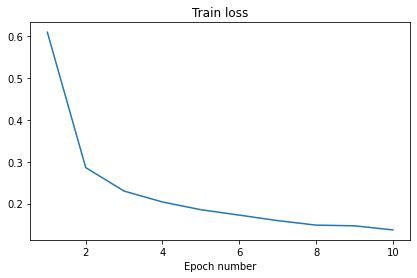

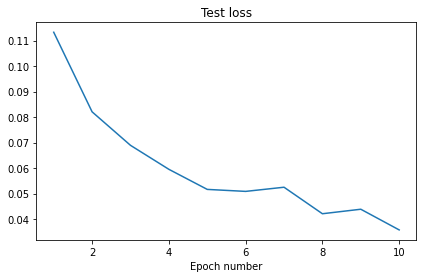

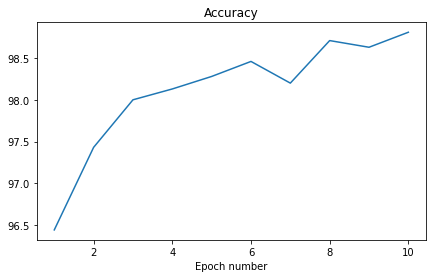

In [15]:
plt.figure(1, figsize=(6.81, 4))
plt.plot(np.arange(1,11,1),train_loss_list)
plt.title('Train loss')
plt.xlabel('Epoch number')

plt.figure(2,figsize=(6.81, 4))
plt.plot(np.arange(1,11,1),test_loss_list)
plt.title('Test loss')
plt.xlabel('Epoch number')

plt.figure(3,figsize=(6.98, 4))
plt.plot(np.arange(1,11,1),accuracy_list)
plt.title('Accuracy')
plt.xlabel('Epoch number')


#### Confusion Matrix

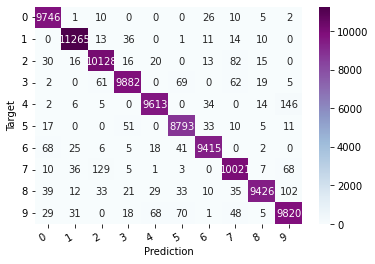

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="BuPu")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Target')
  plt.xlabel('Prediction');

class_names = [0,1,2,3,4,5,6,7,8,9]
cm = confusion_matrix(label_list, output_list)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

#### Precision, recall and f1 score

In [29]:
print(classification_report(label_list, output_list))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9800
           1       0.99      0.99      0.99     11350
           2       0.98      0.98      0.98     10320
           3       0.98      0.98      0.98     10100
           4       0.99      0.98      0.98      9820
           5       0.98      0.99      0.98      8920
           6       0.99      0.98      0.98      9580
           7       0.97      0.97      0.97     10280
           8       0.99      0.97      0.98      9740
           9       0.97      0.97      0.97     10090

    accuracy                           0.98    100000
   macro avg       0.98      0.98      0.98    100000
weighted avg       0.98      0.98      0.98    100000

